# Dataset

Predict Bitcoin price for next 30 days

In [1136]:
#import libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing


from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

using BINANCE Exchange API for getting the dataset

In [1137]:
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

Fetching dataset for top three cryptocurrency: Bitcoin,Ripple and Ethereum

In [1138]:
#Bitcoin
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ripple
symbol='XRPUSDT'
RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")
#Ethereum
symbol='ETHUSDT'
ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="48 hours ago UTC")

In [1139]:
#  #Bitcoin
# symbol='BTCUSDT'
# BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="2 days ago UTC")
# #Ripple
# symbol='XRPUSDT'
# RIP=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="2 days  ago UTC")
# #Ethereum
# symbol='ETHUSDT'
# ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_1MINUTE,start_str="2 days  ago UTC")

adding columns to the dataset

In [1140]:
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
RIP=pd.DataFrame(RIP,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
ETH=pd.DataFrame(ETH,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

Datatypes information

In [1141]:
print("BTC Datatypes:")
print(BTC.dtypes)

BTC Datatypes:
Open time                        int64
Open                            object
High                            object
Low                             object
Close                           object
Volume                          object
Close time                       int64
Quote asset volume              object
Number of trades                 int64
Taker buy base asset volume     object
Taker buy quote asset volume    object
Can be ignored                  object
dtype: object


In [1142]:
print("Data head")
print(BTC.head())

Data head
       Open time           Open           High            Low          Close  \
0  1589299320000  8912.24000000  8913.00000000  8900.00000000  8900.00000000   
1  1589299380000  8900.75000000  8907.65000000  8890.54000000  8895.62000000   
2  1589299440000  8895.63000000  8899.75000000  8890.42000000  8892.28000000   
3  1589299500000  8893.42000000  8893.97000000  8880.01000000  8885.51000000   
4  1589299560000  8885.58000000  8894.49000000  8882.50000000  8890.28000000   

         Volume     Close time Quote asset volume  Number of trades  \
0   51.48671100  1589299379999    458578.88074517               590   
1  134.85010100  1589299439999   1200080.25695653               795   
2   33.23528400  1589299499999    295594.11752691               363   
3   33.31309300  1589299559999    296078.65575438               546   
4   23.95394000  1589299619999    212960.51669922               432   

  Taker buy base asset volume Taker buy quote asset volume Can be ignored  
0     

In [1143]:
print(RIP.head())

       Open time        Open        High         Low       Close  \
0  1589299320000  0.19885000  0.19886000  0.19869000  0.19873000   
1  1589299380000  0.19860000  0.19872000  0.19852000  0.19870000   
2  1589299440000  0.19858000  0.19862000  0.19846000  0.19850000   
3  1589299500000  0.19847000  0.19851000  0.19830000  0.19832000   
4  1589299560000  0.19831000  0.19843000  0.19829000  0.19831000   

           Volume     Close time Quote asset volume  Number of trades  \
0  49403.30000000  1589299379999      9819.28984100                34   
1  73834.60000000  1589299439999     14661.71138100                46   
2  55350.60000000  1589299499999     10990.52133400                37   
3  23161.30000000  1589299559999      4594.63351600                26   
4  39667.60000000  1589299619999      7867.57083100                31   

  Taker buy base asset volume Taker buy quote asset volume Can be ignored  
0              31103.80000000                6182.11009800              0  


Open time and close time was converted to date-time format from String 

In [1144]:
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
RIP['Open time']=pd.to_datetime(RIP['Open time'],unit='ms')
RIP['Close time']=pd.to_datetime(RIP['Close time'],unit='ms')
ETH['Open time']=pd.to_datetime(ETH['Open time'],unit='ms')
ETH['Close time']=pd.to_datetime(ETH['Close time'],unit='ms')

Close price and volume traded are converted to float

In [1145]:
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
BTC['Open']=BTC['Open'].astype(float)
BTC['High']=BTC['High'].astype(float)
BTC['Low']=BTC['Low'].astype(float)
RIP['Close']=RIP['Close'].astype(float)
RIP['Volume']=RIP['Volume'].astype(float)
RIP['Open']=RIP['Open'].astype(float)
RIP['High']=RIP['High'].astype(float)
RIP['Low']=RIP['Low'].astype(float)
ETH['Close']=ETH['Close'].astype(float)
ETH['Volume']=ETH['Volume'].astype(float)
ETH['Open']=ETH['Open'].astype(float)
ETH['High']=ETH['High'].astype(float)
ETH['Low']=ETH['Low'].astype(float)

Shape of the dataset

In [1146]:
print("Shape of the dataset:",BTC.shape)
print("Shape of the dataset:",RIP.shape)
print("Shape of the dataset:",ETH.shape)

Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)
Shape of the dataset: (2880, 12)


Statistics of each cyptocurrency

In [1147]:
print("BTC statistics:")
print(BTC.describe())
print("RIP statistics:")
print(RIP.describe())
print("ETH statistics:")
print(ETH.describe())

BTC statistics:
              Open         High          Low        Close       Volume  \
count  2880.000000  2880.000000  2880.000000  2880.000000  2880.000000   
mean   9164.440760  9170.630455  9158.162878  9164.730375    74.783528   
std     292.283004   293.750041   290.684379   292.462051   103.037234   
min    8741.250000  8771.440000  8730.060000  8743.780000     4.515822   
25%    8908.635000  8913.515000  8904.895000  8908.632500    26.289641   
50%    9086.895000  9091.425000  9081.935000  9086.965000    45.960336   
75%    9335.595000  9341.880000  9330.000000  9335.642500    84.262052   
max    9931.780000  9939.000000  9892.330000  9930.020000  2114.112345   

       Number of trades  
count       2880.000000  
mean         684.579167  
std          712.852702  
min           84.000000  
25%          335.000000  
50%          500.000000  
75%          774.000000  
max        14958.000000  
RIP statistics:
              Open         High          Low        Close        Vo

Checking for missing values

In [1148]:
print("BTC Missing Details:")
print(BTC.isnull().any())
print("RIP Missing Details:")
print(RIP.isnull().any())
print("ETH Missing Details:")
print(ETH.isnull().any())

BTC Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
RIP Missing Details:
Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool
ETH Missing Details:
O

Visualizations

Text(0, 0.5, 'Close Price')

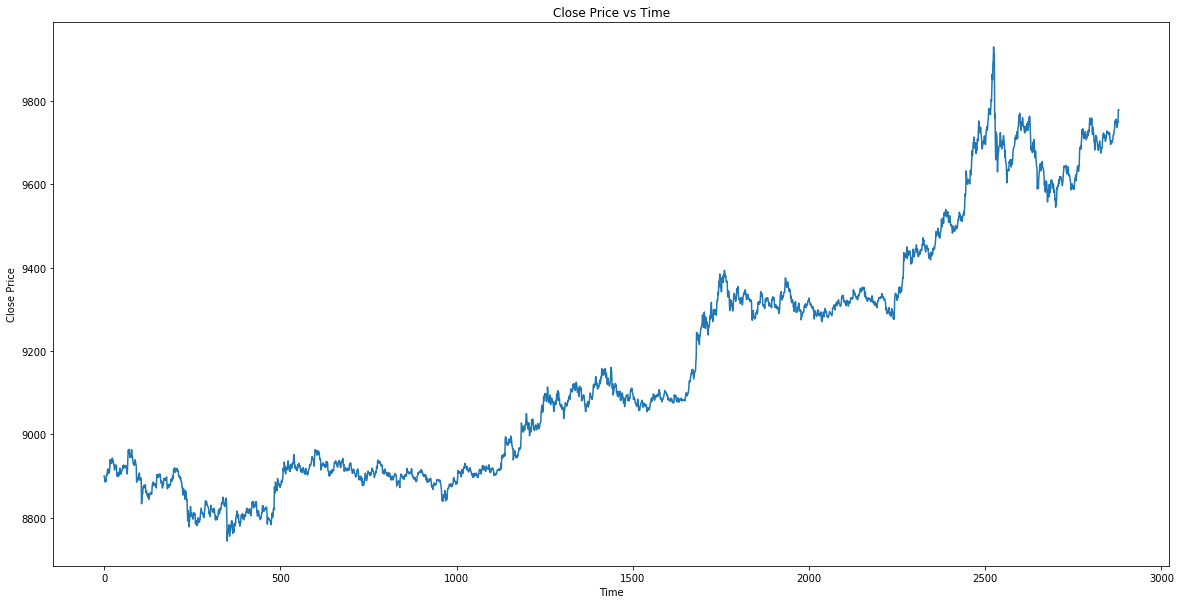

In [1149]:
BTC['Close'].plot(figsize=(20,10),title='Close Price vs Time')
plt.xlabel('Time') 
plt.ylabel('Close Price') 

 /opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:the 'freq'' keyword is deprecated, use 'period' instead


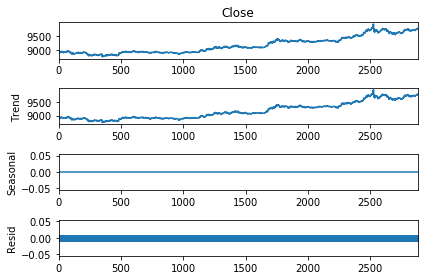

In [1150]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series=BTC['Close']
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

 /opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:the 'freq'' keyword is deprecated, use 'period' instead


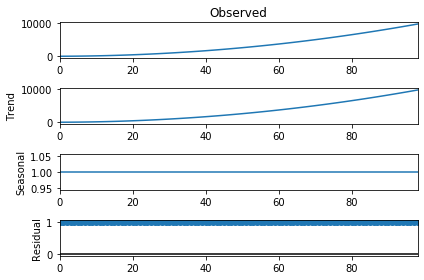

In [1151]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=1)
result.plot()
pyplot.show()

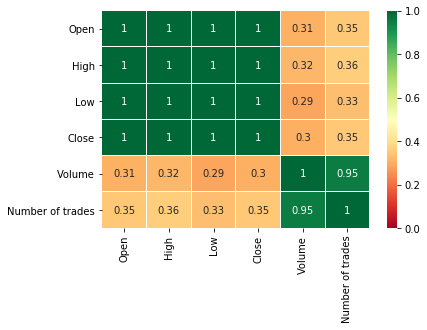

In [1152]:
sns.heatmap(BTC.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

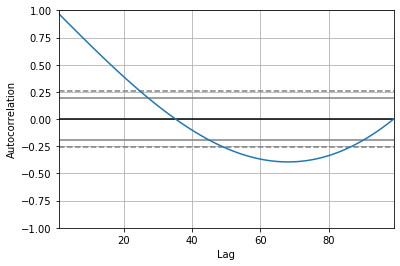

In [1153]:
autocorrelation_plot(series)

preprocessing

In [1154]:
combined_df = pd.DataFrame()
currencies = ["BTC","RIP","ETH"] 
datasets = [BTC,RIP,ETH]
# currencies = ["BTC"] 
# datasets = [BTC]
for i in range(len(currencies)):
    currency=currencies[i]
    df=datasets[i]
    df.rename(columns={"Close": f"{currency}_Close", "Volume": f"{currency}_Volume"}, inplace=True)
    df.set_index("Open time", inplace=True)
    df = df[[f"{currency}_Close", f"{currency}_Volume"]]
    if len(combined_df)==0:
        combined_df=df
    else:  # otherwise, join this data to the main one
        combined_df=combined_df.join(df)
combined_df.fillna(method="ffill", inplace=True) # missing values filled with the previously known values

In [1155]:
feature_length=60  # how long of a preceeding sequence to take as features
future_timeline=1 # to what we want to predict short term or long term 
currency="BTC" # which cryptocurrency we are predicting
combined_df['Future_Value']=combined_df[f'{currency}_Close'].shift(-future_timeline)

In [1156]:
print("Combined_DF")
combined_df.head()

Combined_DF


BTC_Close  BTC_Volume  RIP_Close  RIP_Volume  ETH_Close  \
Open time                                                                      
2020-05-12 16:02:00    8900.00   51.486711    0.19873     49403.3     191.26   
2020-05-12 16:03:00    8895.62  134.850101    0.19870     73834.6     191.14   
2020-05-12 16:04:00    8892.28   33.235284    0.19850     55350.6     191.02   
2020-05-12 16:05:00    8885.51   33.313093    0.19832     23161.3     190.80   
2020-05-12 16:06:00    8890.28   23.953940    0.19831     39667.6     190.89   

                     ETH_Volume  Future_Value  
Open time                                      
2020-05-12 16:02:00   287.24315       8895.62  
2020-05-12 16:03:00   414.41494       8892.28  
2020-05-12 16:04:00   328.66120       8885.51  
2020-05-12 16:05:00   207.40285       8890.28  
2020-05-12 16:06:00    90.07830       8887.27

standaridzation and normalization

In [1157]:
def preprocess(df):

    for col in df.columns:  # go through all of the columns
        if col != "Future_Value":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.
    return df

combined_df=preprocess(combined_df)

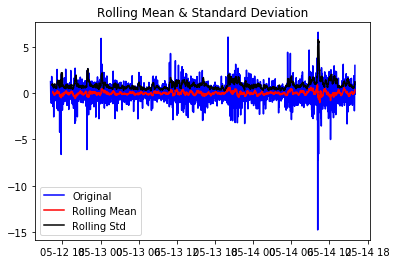

ADF Stastistic: -29.185058
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.433 
	5%: -2.863 
	10%: -2.567 


In [1158]:
def test_stationarity(x):
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = combined_df['BTC_Close']      
test_stationarity(ts)

spliting into train and validation

In [1159]:
times=sorted(combined_df.index.values)
last_5pct=sorted(combined_df.index.values)[-int(0.05*len(times))]
validation_df = combined_df[(combined_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
train_df = combined_df[(combined_df.index < last_5pct)]  

In [1160]:
print("Length validation dataset:",len(validation_df))
print("Length train dataset:",len(train_df))

Length validation dataset: 143
Length train dataset: 2730


Getting features for predcitions

In [1161]:
def features(df):
    sequential_data=[]
    index=[]
    count=0
    prev_days = deque(maxlen=feature_length)
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days)==feature_length:
            sequential_data.append([np.array(prev_days), i[-1]]) 
            index.append(df.index[count])
        count=count+1
            

    random.shuffle(sequential_data)
    X = []
    y = []
    #print(sequential_data)
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), y,index

train_x, train_y,index_train=features(train_df) 
validation_x, validation_y,index_validation=features(validation_df)

In [1162]:
print((validation_x.shape))
print((train_x.shape))

(84, 60, 6)
(2671, 60, 6)


In [1163]:
train_x_NN=train_x
validation_x_NN=validation_x
train_y_NN= np.array(train_y) 
validation_y_NN= np.array(validation_y) 

In [1164]:
train_x=train_x.reshape(len(train_x),360)
validation_x=validation_x.reshape(len(validation_x),360)

Model

In [1165]:
# np.random.seed(1)
# kernel =  C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# gp.fit(train_x, train_y)
# print("GPML kernel: %s" % gp.kernel_)
# print("Log-marginal-likelihood: %.3f"
#       % gp.log_marginal_likelihood(gp.kernel_.theta))
# y_pred, sigma = gp.predict(validation_x, return_std=True)
# print("Value at Test points",y_pred)
# print("Original Value at Test points:",validation_y)
# print("Confidenne at Test point predictions ",sigma)
# rms = sqrt(mean_squared_error(validation_y, y_pred))
# print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=25.4)
Log-marginal-likelihood: -7770165.366
Value at Test points [9250.89736732 9354.66799769 9083.66099848 9150.88980084 8953.16597197
 9182.4008378  9016.9900471  9138.31746613 9149.44216992 9273.95791104
 9214.63368518 9078.55631149 9112.114347   9071.22365082 9058.40669383
 9134.36658584 9253.47207429 9253.74875277 9054.84196143 9240.40382245
 9333.79675322 9147.29594385 9113.61191344 9100.58375669 9073.96068666
 8899.74951206 9103.36323292 9106.86823019 9177.08741344 9243.91838571
 9308.15235965 9236.89767005 9249.06242812 8883.14972759 9231.79025408
 9328.74825328 9141.78261317 9047.38486812 9157.3570049  9259.94563522
 9084.64811987 9109.99912318 9219.07053539 9021.13096753 9111.84527528
 9292.25059287 9395.02221178 8985.2810558  9124.28500187 9393.96602328
 9190.41567393 9125.4547744  9272.5362419  8881.05877619 9308.80649754
 9189.31447233 9226.28324303 8912.67928756 9232.30977136 8926.93407534
 9161.45919015 8998.46351831 9223.43501031 

In [1059]:
# np.random.seed(1)
# kernel =  C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# gp.fit(train_x, train_y)
# print("GPML kernel: %s" % gp.kernel_)
# print("Log-marginal-likelihood: %.3f"
#       % gp.log_marginal_likelihood(gp.kernel_.theta))
# y_pred, sigma = gp.predict(validation_x, return_std=True)
# print("Value at Test points",y_pred)
# print("Original Value at Test points:",validation_y)
# print("Confidenne at Test point predictions ",sigma)
# rms = sqrt(mean_squared_error(validation_y, y_pred))
# print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=14)
Log-marginal-likelihood: -5429681.287
Value at Test points [9286.0983688  9052.83076703 9095.74221532 9338.3266226  9375.596026
 9130.78392282 9145.34582639 9094.61908745 9166.26102208 9192.25341183
 9189.83576773 9390.13007634 9147.43061978 9016.17560014 9068.64379922
 9046.83574953 9318.89172968 8772.39283214 9080.82669592 9348.97174741
 9299.78999282 9158.66053147 9331.81764799 9354.53442596 9352.00330046
 9099.78087451 9117.91718864 9310.11733291 8968.54785483 9372.33443648
 9348.89373689 9058.0163918  9033.31025168 9455.63298594 9229.71108756
 9282.91774386 9117.7037019  9009.21732158 8721.18884129 9011.48043166
 9327.0020787  9072.77128711 9186.30984172 9047.23697768 9037.4227085
 9188.1046456  9185.00054864 9028.18218719 9351.33443319 9068.22401664
 9117.31515132 8995.32671854 9294.57654385 9327.88139436 9097.22196377
 9164.33507705 9262.36346724 8949.75240535 9369.82736157 9237.10274216
 8912.98544305 8986.44478147 9242.1578147  8978.

In [951]:
# np.random.seed(1)
# kernel =  C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2))  better around 
# gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
# gp.fit(train_x, train_y)
# print("GPML kernel: %s" % gp.kernel_)
# print("Log-marginal-likelihood: %.3f"
#       % gp.log_marginal_likelihood(gp.kernel_.theta))
# y_pred, sigma = gp.predict(validation_x, return_std=True)
# print("Value at Test points",y_pred)
# print("Original Value at Test points:",validation_y)
# print("Confidenne at Test point predictions ",1.9600 * sigma)
# rms = sqrt(mean_squared_error(validation_y, y_pred))
# print("RMSE is:",rms)

GPML kernel: 31.6**2 * RBF(length_scale=14)
Log-marginal-likelihood: -5209132.298
Value at Test points [9278.62350073 9040.36835092 8941.18206334 8500.77307294 8631.7833218
 8748.23584435 9177.94417003 8704.11741099 8702.12021288 8725.06334809
 9146.02650037 9254.84842052 8604.05018192 9212.41518024 8361.47251652
 8747.41405487 9038.60605118 9033.15151309 9149.35543115 9083.53580121
 9248.55710995 8730.4372214  8746.01400359 9046.94281837 8913.25565675
 9050.94338054 8588.68728487 8341.39755569 9176.46870085 9047.54297696
 9269.92619965 8652.75462438 9124.69802126 8670.97689747 8731.09729293
 8705.45283992 8855.30506612 8461.75859845 9134.24061639 9205.22330577
 8482.47739587 8743.90283625 9089.20500015 8990.25749886 9167.73953516
 9255.95664965 8550.31365591 9169.30141103 8782.88933076 8786.60542477
 8525.15793687 8760.75210328 9034.96681114 9184.52768982 8618.26409684
 8440.71082924 9152.34942282 9014.29994099 9114.66857573 8915.01989043
 8611.31340744 9139.30755166 8917.09056829 890

In [1167]:
def plot(X,plot1,plot2):#the plotting fucntion in general
    Xi = list(range(len(X)))
    plt.xticks(Xi, X)
    plt.plot(Xi,plot1,marker='o',markersize=5,label = "Actual") 
    plt.plot(Xi,plot2,marker='o',markersize=5,label = "Predicted") 
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title("Time vs Close price") 
    plt.legend()
    plt.show()

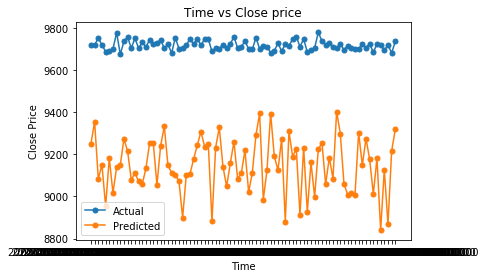

In [1168]:
predicted_df=pd.DataFrame(index=index_validation)
predicted_df['Predicted_Future_Value']=y_pred
actual_df=pd.DataFrame(index=index_validation)
actual_df['Future_Value']=validation_y
plot(predicted_df.index.values,actual_df['Future_Value'],predicted_df['Predicted_Future_Value'])

In [1065]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(train_x)
principal_train = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])
principalComponents = pca.fit_transform(validation_x)
principal_validation = pd.DataFrame(data = principalComponents,columns = ['principal component 1'])

In [1066]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [1187]:
y_pred_train, sigma = gp.predict(train_x, return_std=True)

 /opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning:Predicted variances smaller than 0. Setting those variances to 0.


ValueError: operands could not be broadcast together with shapes (84,) (2671,) 

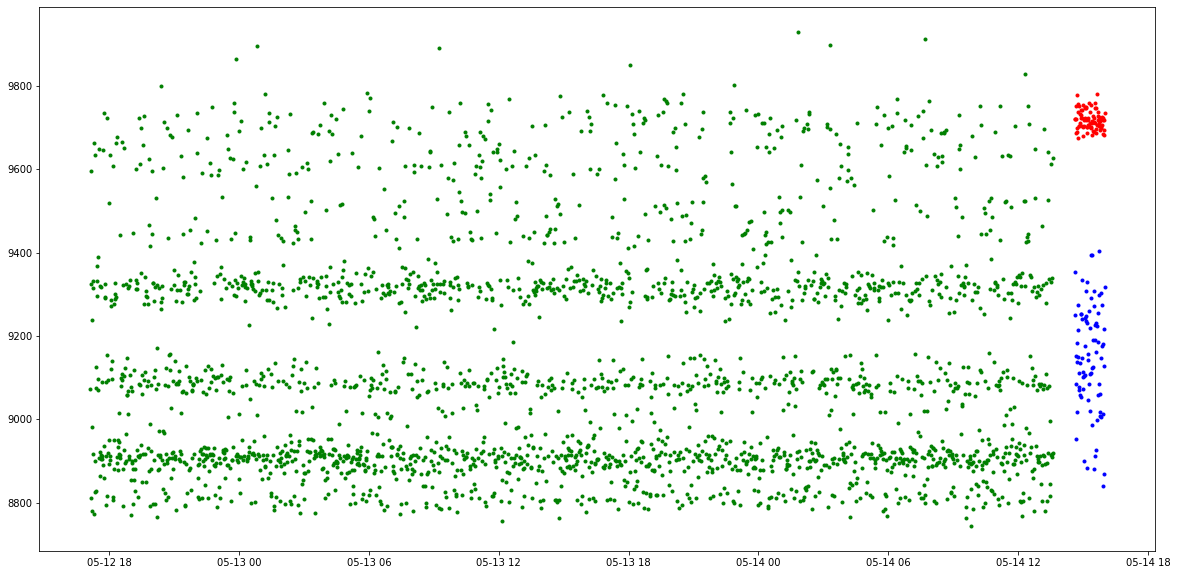

In [1198]:
plt.figure(figsize=(20,10))
plt.plot(index_train,train_y,"g.", label='Observations')
plt.plot(index_validation, validation_y, 'r.', label='Prediction')
plt.plot(index_validation, y_pred, 'b.', label='Prediction')
plt.fill(np.concatenate([index_validation, index_validation[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.ylim(-10, 20)
#plt.legend(loc='upper left')


In [1178]:
print(min_)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27

LSTM

In [474]:
train_x_NN.shape

(2671, 60, 6)

In [477]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(train_x_NN.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
# #model.add(BatchNormalization())

# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.1))
# #model.add(BatchNormalization())

# model.add(LSTM(128))
# model.add(Dropout(0.2))
# #model.add(BatchNormalization())

# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(1, activation='softmax'))

# model.compile(optimizer="adam",loss="mean_squared_error")
# model.fit(train_x_NN,train_y_NN,epochs=5,batch_size=64)

# predicted_data=model.predict(validation_x_NN)
# print(np.sqrt(mean_squared_error(validation_y_NN, predicted_data)))

Epoch 1/5
42/42 [==============================] - 13s 298ms/step - loss: 80234488.0000
Epoch 2/5
42/42 [==============================] - 10s 248ms/step - loss: 80234472.0000
Epoch 3/5
42/42 [==============================] - 11s 251ms/step - loss: 80234456.0000
Epoch 4/5
42/42 [==============================] - 10s 246ms/step - loss: 80234456.0000
Epoch 5/5
42/42 [==============================] - 11s 263ms/step - loss: 80234480.0000
9328.369608346116


In [507]:
from keras.layers import LSTM

model=Sequential()
model.add(LSTM(10,input_shape=(train_x_NN.shape[1:]),activation="relu"))
model.add(Dense(2))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(x_train,y_train,epochs=10,batch_size=32)

TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.recurrent.LSTM object at 0x14a66cd10>

RNN

In [473]:
len(train_x_NN)

2671

In [439]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(train_x_NN.shape[1:])))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x_NN,train_y_NN,epochs=5,batch_size=64)

predicted_data=regressor.predict(validation_x_NN)
print(np.sqrt(mean_squared_error(validation_y_NN, predicted_data)))


Epoch 1/5
2671/2671 [==============================] - 34s 13ms/step - loss: 1001498893.4631
Epoch 2/5
2671/2671 [==============================] - 31s 12ms/step - loss: 13265917.1258
Epoch 3/5
2671/2671 [==============================] - 27s 10ms/step - loss: 10448532.3639
Epoch 4/5
2671/2671 [==============================] - 27s 10ms/step - loss: 8066278.8982
Epoch 5/5
2671/2671 [==============================] - 30s 11ms/step - loss: 2717292.1418
801.7582916464512


In [527]:
num_trees = 200
scoring    = "neg_root_mean_squared_error"
seed=9

In [528]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_depth=50,random_state=0,min_samples_split=2)))
#models.append(('GB',GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)))
#models.append(('NB', GaussianNB()))
#svm=SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed)
models.append(('SVM', SVC(kernel='rbf', class_weight='balanced',C=5,gamma=0.005,random_state=seed) ))
#models.append(('SVM', BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42) ))
#models.append((BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=42))
#models.append(('SVM', SVC(random_state=seed)))

In [530]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, train_x, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-t

LR: nan (nan)


KeyboardInterrupt: 

In [533]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x, train_y)
predicted_data=reg.predict(validation_x)
print(np.sqrt(mean_squared_error(validation_y, predicted_data)))

375.85526137039864


linear regression train score: 170.48397348822752
linear regression test score: 375.85526137039864
ridge regression train score low alpha: 170.483973493717
ridge regression test score low alpha: 375.85445170352597
ridge regression train score high alpha: 170.79945374852235
ridge regression test score high alpha: 370.16897648747494


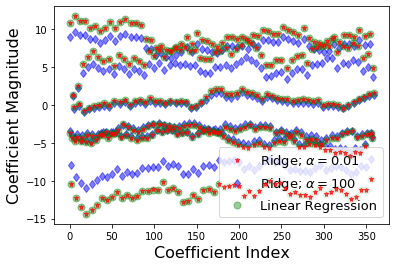

In [548]:
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(train_x, train_y)
rr = Ridge(alpha=0.01) 
rr.fit(train_x, train_y)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train_x, train_y)

train_score_pred=lr.predict(train_x)
train_score=np.sqrt(mean_squared_error(train_y, train_score_pred))
test_score_pred=lr.predict(validation_x)
test_score=np.sqrt(mean_squared_error(validation_y, test_score_pred))

Ridge_train_score_pred=rr.predict(train_x)
Ridge_train_score=np.sqrt(mean_squared_error(train_y, Ridge_train_score_pred))
Ridge_test_score_pred=rr.predict(validation_x)
Ridge_test_score=np.sqrt(mean_squared_error(validation_y, Ridge_test_score_pred))

Ridge_train_score100_pred=rr100.predict(train_x)
Ridge_train_score100=np.sqrt(mean_squared_error(train_y, Ridge_train_score100_pred))
Ridge_test_score100_pred=rr100.predict(validation_x)
Ridge_test_score100=np.sqrt(mean_squared_error(validation_y, Ridge_test_score100_pred))



print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [857]:
import numpy as np
 
def exponential_cov(x, y, params): #kernel evaluation e power formuala
    return params[1] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

In [858]:
def conditional(x_new, x, y, params): #kernel matric
 
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)

    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
 
    return(mu.squeeze(), sigma.squeeze())

10.0
[-3.00000000e+00 -2.99000000e+00 -2.98000000e+00 -2.97000000e+00
 -2.96000000e+00 -2.95000000e+00 -2.94000000e+00 -2.93000000e+00
 -2.92000000e+00 -2.91000000e+00 -2.90000000e+00 -2.89000000e+00
 -2.88000000e+00 -2.87000000e+00 -2.86000000e+00 -2.85000000e+00
 -2.84000000e+00 -2.83000000e+00 -2.82000000e+00 -2.81000000e+00
 -2.80000000e+00 -2.79000000e+00 -2.78000000e+00 -2.77000000e+00
 -2.76000000e+00 -2.75000000e+00 -2.74000000e+00 -2.73000000e+00
 -2.72000000e+00 -2.71000000e+00 -2.70000000e+00 -2.69000000e+00
 -2.68000000e+00 -2.67000000e+00 -2.66000000e+00 -2.65000000e+00
 -2.64000000e+00 -2.63000000e+00 -2.62000000e+00 -2.61000000e+00
 -2.60000000e+00 -2.59000000e+00 -2.58000000e+00 -2.57000000e+00
 -2.56000000e+00 -2.55000000e+00 -2.54000000e+00 -2.53000000e+00
 -2.52000000e+00 -2.51000000e+00 -2.50000000e+00 -2.49000000e+00
 -2.48000000e+00 -2.47000000e+00 -2.46000000e+00 -2.45000000e+00
 -2.44000000e+00 -2.43000000e+00 -2.42000000e+00 -2.41000000e+00
 -2.40000000e+00 -2.

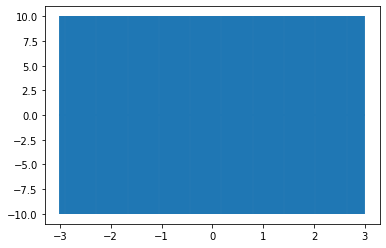

In [859]:
import matplotlib.pylab as plt #plotting erro bar
 
θ = [1,10] #length
σ_0 = exponential_cov(0, 0, θ)
print(σ_0)
xpts = np.arange(-3, 3, step=0.01)
# plt.xlim(-10, 20)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0)
print(xpts)

In [860]:
x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[11.44723709839614]

In [861]:
σ_1 = exponential_cov(x, x, θ)
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data] # kernel calculation
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new
 
x_pred = np.linspace(-3, 3, 1000)
print(x_pred)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

[-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.51351351 -2.

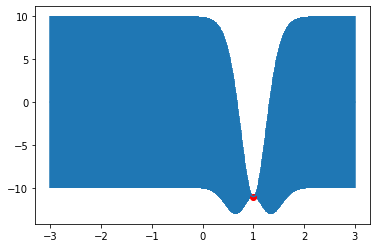

In [848]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")


In [813]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2

-0.3840545256158825

In [814]:
x.append(-0.7)
y.append(y2)
 
σ_2 = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

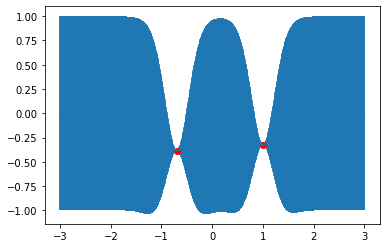

In [815]:
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")


In [816]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([-0.89479011, -0.85132156, -0.20482245,  1.38973795,  0.21693699])

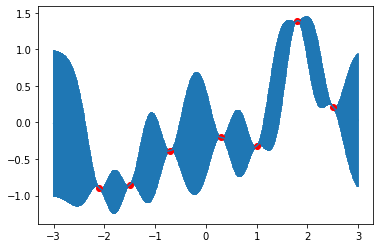

In [817]:
x += x_more
y += y_more.tolist()
 
σ_new = exponential_cov(x, x, θ)
predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]
 
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0)
plt.plot(x, y, "ro")